In [8]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import time
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)

In [10]:
df = pd.read_csv("../preprocessing/iot23_combined.csv")
del df["Unnamed: 0"]
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,1,0,0,0,0,0,0
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344670,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0
1344671,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0
1344672,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0
1344673,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,DDoS,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df['label']

KeyboardInterrupt: 

In [ ]:
scaler = MinMaxScaler()
normalized_x = scaler.fit_transform(X)
normalized_x

array([[8.16450401e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, Y, random_state= 100, test_size=0.2)

In [12]:
start = time.time()
clf = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
clf.fit(X_train, Y_train) 
Y_pred = clf.predict(X_test)
end = time.time()
print(f'time: {end - start}')
print(clf.score(X_train, Y_train))

time: 11.505471229553223
0.7848309070965103


In [13]:
acc = accuracy_score(Y_test, Y_pred)
print(acc)

0.7840630635655456


In [14]:
rep = classification_report(Y_test, Y_pred, output_dict=True)
d = pd.DataFrame(rep).transpose()
d.to_csv("../Model Results/RF.csv")
print(classification_report(Y_test, Y_pred))

                            precision    recall  f1-score   support

                    Attack       0.98      0.99      0.99       783
                    Benign       0.95      0.56      0.71     40045
                       C&C       1.00      0.10      0.19      3017
          C&C-FileDownload       0.50      0.57      0.53         7
             C&C-HeartBeat       0.90      0.36      0.51        50
C&C-HeartBeat-FileDownload       0.00      0.00      0.00         0
                 C&C-Torii       1.00      0.20      0.33        10
                      DDoS       1.00      0.82      0.90     27972
              FileDownload       0.00      0.00      0.00         3
                     Okiru       0.00      0.00      0.00     32607
 PartOfAHorizontalPortScan       0.74      1.00      0.85    164441

                  accuracy                           0.78    268935
                 macro avg       0.64      0.42      0.46    268935
              weighted avg       0.71      0.7

In [15]:
class_names = df['label'].unique()
class_names

array(['PartOfAHorizontalPortScan', 'Benign', 'C&C', 'Attack',
       'C&C-HeartBeat', 'Okiru', 'DDoS', 'C&C-Torii', 'C&C-FileDownload',
       'FileDownload', 'C&C-HeartBeat-FileDownload', 'C&C-Mirai'],
      dtype=object)

Text(0.5, 15.0, 'Predicted label')

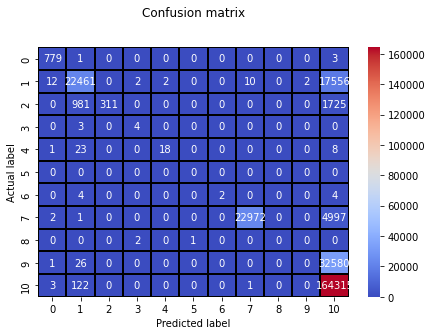

In [16]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="coolwarm" ,fmt='g', linewidths=2, linecolor='black')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')